In [11]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('../Data/HR.csv')
df = df.dropna()
df = df[df['last_evaluation']<=1][df['salary']!='name'][df['department']!='sale']

In [12]:
#t独立分布检验
#分析不同部门离职率的关系
dp_indices = df.groupby(by='department').indices
sales_values=df['left'].iloc[dp_indices['sales']].values
technical_values=df['left'].iloc[dp_indices['technical']].values
print(ss.ttest_ind(sales_values,technical_values))

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)


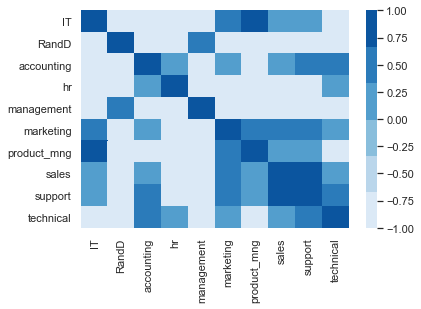

In [62]:
dp_keys = list(dp_indices.keys())
l=len(dp_keys)
dp_t_mat= np.zeros((l,l))
for i in range(l):
    for j in range(l):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,
                               df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        p_value = -1 if p_value<0.05 else p_value
        dp_t_mat[i][j]=p_value
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys,
           cmap=sns.color_palette('Blues'))

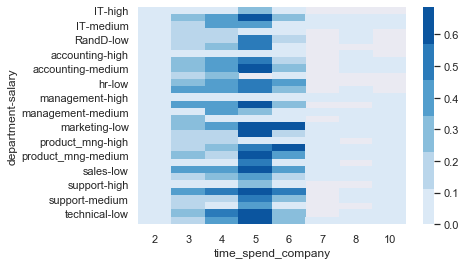

In [61]:
#交叉分析
#分析各种属性对离职率的影响
piv_tb_1 = pd.pivot_table(df,values='left',index=['department','salary'],
                        columns=['time_spend_company'],aggfunc=np.mean)
piv_tb_2 = pd.pivot_table(df,values='left',index=['department','salary'],
                        columns=['number_project'],aggfunc=np.mean)
piv_tb_3 = pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],
                        columns=['Work_accident'],aggfunc=np.mean)
sns.heatmap(piv_tb_1,cmap=sns.color_palette('Blues'))

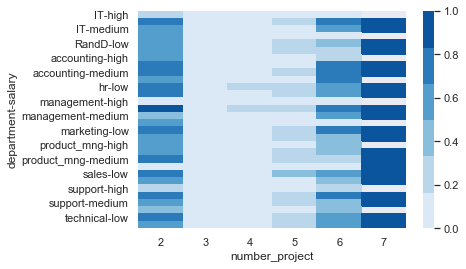

In [59]:
sns.heatmap(piv_tb_2,cmap=sns.color_palette('Blues'))

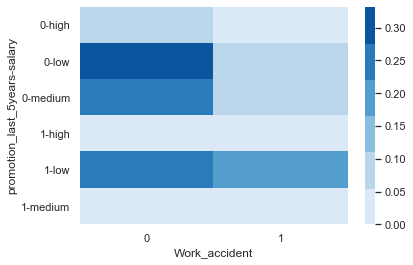

In [60]:
sns.heatmap(piv_tb_3,cmap=sns.color_palette('Blues'))